## 데이터 입출력

In [1]:
import operator
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [2]:
data = pd.read_csv("data/Auction_master_train.csv", sep=",")

1. 결측값 제거

In [3]:
data_drop_column = data.dropna(axis=1)

2. Heatmap 출력

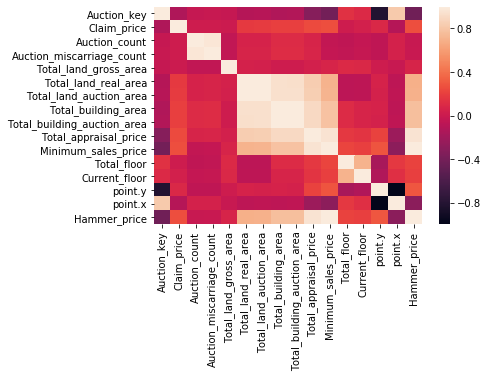

In [4]:
sns.heatmap(data=data_drop_column.corr())
plt.show()

3. Histogram 출력

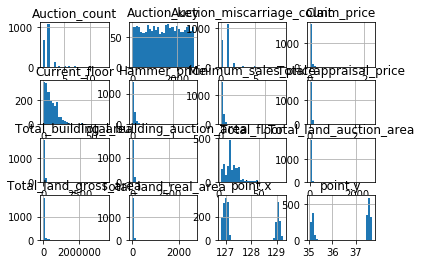

In [5]:
data_drop_column.hist(bins=30)
plt.show()

4. 시각화 5개

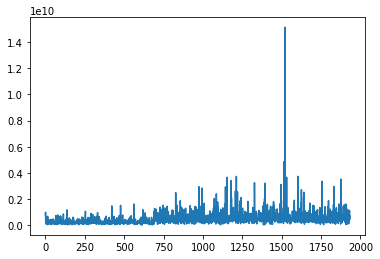

In [6]:
plt.plot(data_drop_column['Hammer_price'])
plt.show()

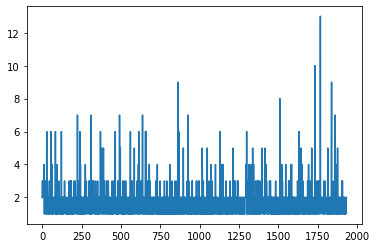

In [7]:
plt.plot(data_drop_column['Auction_count'])
plt.show()

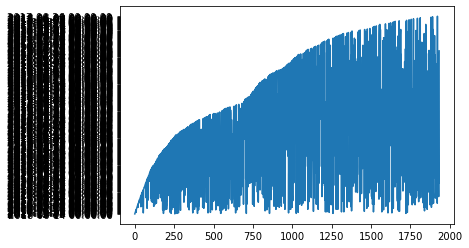

In [8]:
plt.plot(data_drop_column['Close_date'])
plt.show()

/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48512 missing from current font.
  font.

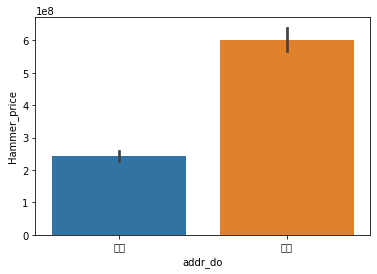

In [9]:
sns.barplot(data=data_drop_column, x='addr_do', y='Hammer_price')
plt.show()

/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.

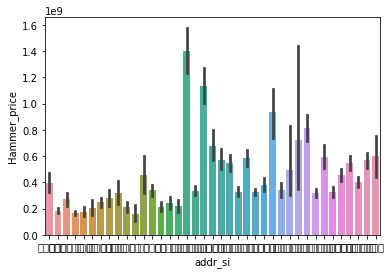

In [10]:
sns.barplot(data=data_drop_column, x='addr_si', y='Hammer_price')
plt.show()

 일단 전체 row들의 특정 칼럼 별로 데이터를 본 결과로 매우 다양하게 있고 서로 관계가
 있을 법한 column을 선정해보고 그 column 을 시각화 해볼 예정이다.
 
 Claim_price : 경매 신청인의 청구 금액
 Auction_count : 경매 횟수
 Auction_miscarriage_count : 총 유찰 횟수
 Total_land_gross_area : 총 토지 전체 면적
 Total_land_real_area : 총 토지 실제 면적
 addr_do : 시_도
 addr_si : 주소_시군구
 Total_appraisal_price : 총 감정가
 Appraisal_company : 감정사
 Minimum_sales_price : 최저매각가격
 First_auction_date : 최초 경매일
 Close_date : 종국일자
 Hammer_price(target) : 낙찰가

- 먼저 필요한 값을 list 자료형으로 만들어 놓기

In [11]:
Claim_price = list(data_drop_column['Claim_price'].values)
Total_Area = list(data_drop_column['Total_land_gross_area'].values)
Real_Area = list(data_drop_column['Total_land_real_area'].values)
Hammer_Price = list(data_drop_column['Hammer_price'].values)
Auction_count = list(data_drop_column['Auction_count'].values)
Auction_f_count = list(data_drop_column['Auction_miscarriage_count'].values)
Minimum_sales_price = list(data_drop_column['Minimum_sales_price'].values)
First_auction_date = list(data_drop_column['First_auction_date'].values)
Close_date = list(data_drop_column['Close_date'].values)
Total_appraisal_price = list(data_drop_column['Total_appraisal_price'].values)


- 칼럼 값들 뽑아보다가 주소도 뽑아봤는데 몇가지 없을 것 같아서 한번 확인해보니 
여기서는 서울 부산밖에 안다루니까 두개를 구분지어서 또 활용하면 괜찮다고 생각했다.

In [12]:
addr_do_list = []
for i in data_drop_column['addr_do'].values:
    if i not in addr_do_list:
        addr_do_list.append(i)
#print(addr_do_list)

- 시군구 리스트

In [13]:
addr_si_list = []
for i in data_drop_column['addr_si'].values:
    if i not in addr_si_list:
        addr_si_list.append(i)
# print(addr_si_list)

- 감정사 리스트 (238개 존재)

In [14]:
company_list = []
for i in data_drop_column['Appraisal_company'].values:
    if i not in company_list:
        company_list.append(i)

- '+++'가 하나도 출력 안된걸 보니 유찰된 경매의 데이터는 들어가지 않았다.
- 혹시라도 낙찰 안된 데이터 있으면 무의미 하다고 생각되어 제거하려 했다.
- 그래서 Final_result 칼럼은 고려하지 않아도 된다는 사실 확인

In [15]:
for i in data_drop_column['Final_result'].values:
    if i != "낙찰":
        print("+++")

1. 토지 면적당 가격 (단위 : 1 m^2)
변수 명 : m_per_price

In [16]:
m_per_price = []

for i, price in enumerate(Hammer_Price):
    if Total_Area[i] == 0:
        m_per_price.append(0)
    else:
        temp = price / Total_Area[i]
        m_per_price.append(temp)

2. 경매가 유찰 될 확률 (경매 횟수에 비례한 유찰 경우)
변수 명 : Auction_success

In [17]:
Auction_success = []

for i, tot_count in enumerate(Auction_count):
    if Auction_f_count[i] == 0:
        Auction_success.append(0)
    else:
        Auction_success.append(Auction_f_count[i] / tot_count)

3. 경매 신청인의 이익 계산 (낙찰가 - 경매 청구 금액)
변수 명 : final_revenue

In [18]:
final_revenue = []

for i, price in enumerate(Hammer_Price):
    final_revenue.append(price - Claim_price[i])

data_drop_column["경매 이익"] = final_revenue

/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


4. 경매가 활발한 지역 순위 지정 (시, 군으로 분류)
변수 명 : Auction_frequency_rank_list


In [19]:
Auction_frequency_rank_list = []

Auction_frequency_rank = {}
for si in addr_si_list:
    Auction_frequency_rank[si] = 0

for i in range(0, len(data_drop_column)):
    for si in addr_si_list:
        if data_drop_column.ix[i]['addr_si'] == si:
            Auction_frequency_rank[si] += int(data_drop_column.ix[i]['Auction_count'])

sortedArr = sorted(Auction_frequency_rank.items(), key=operator.itemgetter(1, 0), reverse=True)

for i in sortedArr:
    Auction_frequency_rank_list.append(i[0])


rank_list_for_result = []

for i in range(0, len(data_drop_column)):
    for j in range(len(Auction_frequency_rank_list)):
        if data_drop_column.ix[i]['addr_si'] == Auction_frequency_rank_list[j]:
            rank_list_for_result.append(j+1)

/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.py

5. 경매 상승 금액 (최저 입찰가와 낙찰가의 차액)
변수 명 : margin_price

In [20]:
margin_price = []

for i, price in enumerate(Hammer_Price):
    margin_price.append(price - Minimum_sales_price[i])

data_drop_column["경매 상승 금액"] = margin_price

/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


6. 감정가와 낙찰가가 맞을 확률 (감정가가 낙찰가를 잘 예측했을 확률)
변수 명 : appraisal_price_accuracy

In [21]:
appraisal_price_accuracy = []

for i, price in enumerate(Hammer_Price):
    sub_price = (abs(price - Total_appraisal_price[i]))
    appraisal_price_accuracy.append(round((price - sub_price) / price, 3))

7. 감정사 순위 (감정가가 상대적으로 정확한 순위)
변수 명 : company_accuracy_rank

In [22]:
company_accuracy_rank = []

company_avg_accuracy = {}
company_tot_accuracy = {}
company_freq = {}

for company in company_list:
    company_tot_accuracy[company] = 0
    company_freq[company] = 0
    company_avg_accuracy[company] = 0

for i in range(0, len(data_drop_column)):
    for company in company_list:
        if data_drop_column.ix[i]['Appraisal_company'] == company:
            company_tot_accuracy[company] += appraisal_price_accuracy[i]
            company_freq[company] += 1

for company in company_list:
    company_avg_accuracy[company] = round(company_tot_accuracy[company] / company_freq[company], 3)

sortedArr = sorted(company_avg_accuracy.items(), key=operator.itemgetter(1, 0), reverse=True)

for i in sortedArr:
    company_accuracy_rank.append(i[0])


company_rank_list_for_result = []

for i in range(0, len(data_drop_column)):
    for j in range(len(company_accuracy_rank)):
        if data_drop_column.ix[i]['Appraisal_company'] == company_accuracy_rank[j]:
            company_rank_list_for_result.append(j+1)

/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/home/minjoon/바탕화면/workspace/Tobigs_repo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


8. 토지 면적 대비 실 면적 비율 (토지 총 면적 과 실 면적 연산)
변수 명 : Real_area_ratio

In [23]:
Real_area_ratio = []

for i, tot_area in enumerate(Total_Area):
    if tot_area == 0:
        Real_area_ratio.append(0)
    else:
        Real_area_ratio.append(round(Real_Area[i] / tot_area, 3) * 100)

9. 데이터의 시간 경과 표시 (오래된 데이터인지 최근 데이터인지 구별을 위함, 몇년 전 자료인지 나타냄, 기준은 현재 시간으로)
변수 명 : elapse_time

In [24]:
elapse_time = []

for close_date in Close_date:
    elapse_time.append(abs(int(str(close_date)[0:4]) - int(str((dt.now()))[0:4])))

10. 경매 진행 기간 (최초 경매일 ~ 종국일자)
변수 명 : Auction_term

In [25]:
Auction_term = []

for i, close_date in enumerate(Close_date):
    start_time_list = First_auction_date[i].split('-')
    start_time = dt(int(start_time_list[0]), int(start_time_list[1]), int(start_time_list[2].split(' ')[0]))

    close_time_list = close_date.split('-')
    close_time = dt(int(close_time_list[0]), int(close_time_list[1]), int(close_time_list[2].split(' ')[0]))

    Auction_term.append(str(close_time - start_time))

최종 결과.

In [26]:
df_result = pd.DataFrame()
df_result["1m^2 당 가격"] = m_per_price
df_result["유찰 확률"] = Auction_success
df_result["경매 이익"] = final_revenue
df_result["경매 빈번 지역 순위"] = rank_list_for_result
df_result["경매 상승 금액"] = margin_price
df_result["감정가 정확도"] = appraisal_price_accuracy
df_result["감정사 정확도 순위"] = company_rank_list_for_result
df_result["실 면적 비율"] = Real_area_ratio
df_result["경매 종료 경과"] = elapse_time
df_result["경매 진행기간"] = Auction_term
print(df_result.head())
print("감사합니다.")

       1m^2 당 가격     유찰 확률       경매 이익  경매 빈번 지역 순위   경매 상승 금액  감정가 정확도  \
0   60355.781449  0.500000 -1006037301            4   91200000    0.900   
1   22879.789798  0.500000   818943132            4  113489999    0.896   
2     623.984932  0.666667    82073489           11   17239999    0.726   
3   10526.490473  0.500000    73317276           20   26179000    0.877   
4  204987.080103  0.500000   112772329            2   22660000    0.929   

   감정사 정확도 순위  실 면적 비율  경매 종료 경과            경매 진행기간  
0         164      0.3         2  121 days, 0:00:00  
1         199      0.0         3   91 days, 0:00:00  
2         122      0.0         3  138 days, 0:00:00  
3         171      0.1         3  160 days, 0:00:00  
4         165      5.8         4   90 days, 0:00:00  
감사합니다.
